In [1]:
# import pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
# read csv
df = pd.read_csv('filtered_music_data_with_librosa.csv')

In [2]:
print("Total # of Observations: ", df.shape[0])

# Drop Features: duration, time signature, mode, preview_url, id
df.drop(columns=["id", "mode", "duration_ms", "time_signature", "preview_url"], inplace=True)


Total # of Observations:  3930


In [3]:
# Drop Outliers

for col in df.columns[1:]:
    column = df[col]
    mean = column.mean()
    std = column.std()
    outliers = (column < mean - 3 * std) | (column > mean + 3 * std)
    print(col, ":", df[outliers].shape[0], "outliers")
    df = df[~outliers]

print("Total # of Observations without Outliers: ", df.shape[0])

# Extract Target Feature

encoder = LabelEncoder()
genre = df.drop(columns=['genre'])
genre_encoded = encoder.fit_transform(genre)

SyntaxError: invalid syntax (303260847.py, line 4)

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'mfcc_1Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_2Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_3Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_4Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_5Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_6Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_7Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_8Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_9Mean'}>],
      

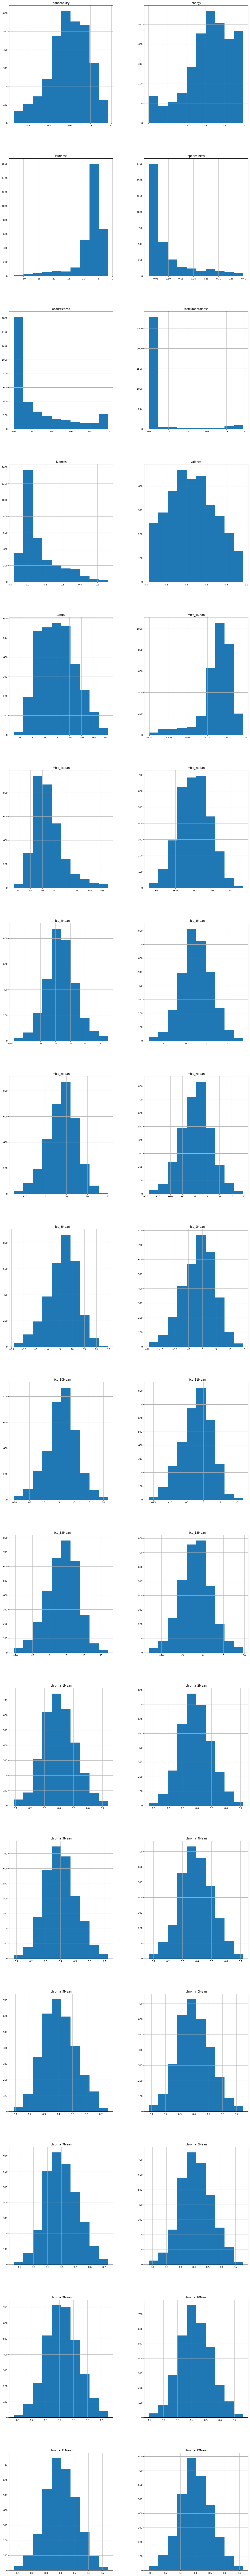

In [ ]:
# Plot Distributions
fig, axis = plt.subplots(17, 2)

fig.set_size_inches(18.5, 200)
df_without_key = df.drop(columns=["key"])
df_without_key.hist(ax=axis)

In [ ]:
# Feature Scaling

# Normalization: 

norm_cols = ['danceability','loudness', 'valence', 'tempo',
 'mfcc_1Mean',
 'mfcc_2Mean',
 'mfcc_3Mean',
 'mfcc_4Mean',
 'mfcc_5Mean',
 'mfcc_6Mean',
 'mfcc_7Mean',
 'mfcc_8Mean',
 'mfcc_9Mean',
 'mfcc_10Mean',
 'mfcc_11Mean',
 'mfcc_12Mean',
 'mfcc_13Mean',
 'chroma_1Mean',
 'chroma_2Mean',
 'chroma_3Mean',
 'chroma_4Mean',
 'chroma_5Mean',
 'chroma_6Mean',
 'chroma_7Mean',
 'chroma_8Mean',
 'chroma_9Mean',
 'chroma_10Mean',
 'chroma_11Mean',
 'chroma_12Mean']

min_max = MinMaxScaler()
scaler = StandardScaler()

df[norm_cols] = scaler.fit_transform(df[norm_cols])

# Standardization
std_cols = ['energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

df[std_cols] = min_max.fit_transform(df[std_cols])

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'mfcc_1Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_2Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_3Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_4Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_5Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_6Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_7Mean'}>],
       [<AxesSubplot: title={'center': 'mfcc_8Mean'}>,
        <AxesSubplot: title={'center': 'mfcc_9Mean'}>],
      

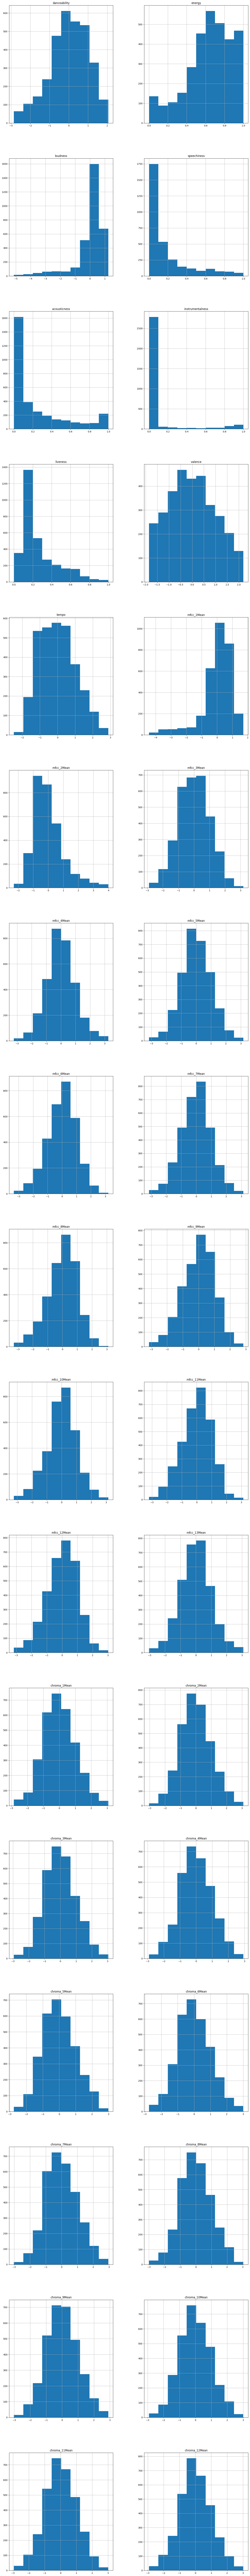

In [ ]:
# Plot Scaled Distributions
fig, axis = plt.subplots(17, 2)

fig.set_size_inches(18.5, 200)

df_without_key = df.drop(columns=["key"])

df_without_key.hist(ax=axis)

In [ ]:
# Convert to CSV for MFCC/Chroma Data
df_without_key = pd.concat([df_without_key, genre_encoded], axis=1)
df_without_key.to_csv("scaled_music_data_with_librosa.csv", index=False)

In [ ]:
# One Hot Encoding Key
df_encoded = pd.get_dummies(df['key'], prefix="key_", dtype='int')

df.drop(columns=["key"], inplace=True)

df = pd.concat([df, df_encoded, genre_encoded], axis=1)

df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mfcc_1Mean,...,key__2,key__3,key__4,key__5,key__6,key__7,key__8,key__9,key__10,key__11
1,-2.479254,0.293037,-1.489617,0.037520,0.851256,0.026510,0.192237,-1.795319,-0.888184,-1.106463,...,0,0,0,0,0,0,0,0,0,0
2,-1.464657,0.005247,-4.047370,0.132251,1.000000,0.827021,0.084104,-1.828368,-1.810714,-4.153737,...,0,1,0,0,0,0,0,0,0,0
3,-1.718306,0.090616,-3.216978,0.067589,0.955779,0.165814,0.082440,-0.845036,0.280969,-3.704999,...,0,0,0,0,0,0,0,1,0,0
8,-2.845157,0.032206,-4.858512,0.057211,0.912563,0.931423,0.170055,-1.809483,-1.886853,-3.897513,...,0,0,0,0,0,0,0,1,0,0
9,-0.595773,0.309150,-1.530926,0.040181,0.945729,0.001914,0.109612,0.713014,-0.797390,-1.469362,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Drop MFCC/Chroma and convert to CSV

df.drop(columns=[ 'mfcc_1Mean',
 'mfcc_2Mean',
 'mfcc_3Mean',
 'mfcc_4Mean',
 'mfcc_5Mean',
 'mfcc_6Mean',
 'mfcc_7Mean',
 'mfcc_8Mean',
 'mfcc_9Mean',
 'mfcc_10Mean',
 'mfcc_11Mean',
 'mfcc_12Mean',
 'mfcc_13Mean',
 'chroma_1Mean',
 'chroma_2Mean',
 'chroma_3Mean',
 'chroma_4Mean',
 'chroma_5Mean',
 'chroma_6Mean',
 'chroma_7Mean',
 'chroma_8Mean',
 'chroma_9Mean',
 'chroma_10Mean',
 'chroma_11Mean',
 'chroma_12Mean'], inplace=True)

df.head()

df.to_csv("scaled_music_data.csv", index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3185 entries, 1 to 3929
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      3185 non-null   float64
 1   energy            3185 non-null   float64
 2   loudness          3185 non-null   float64
 3   speechiness       3185 non-null   float64
 4   acousticness      3185 non-null   float64
 5   instrumentalness  3185 non-null   float64
 6   liveness          3185 non-null   float64
 7   valence           3185 non-null   float64
 8   tempo             3185 non-null   float64
 9   key__0            3185 non-null   int64  
 10  key__1            3185 non-null   int64  
 11  key__2            3185 non-null   int64  
 12  key__3            3185 non-null   int64  
 13  key__4            3185 non-null   int64  
 14  key__5            3185 non-null   int64  
 15  key__6            3185 non-null   int64  
 16  key__7            3185 non-null   int64  
 17  

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=17a4cf4d-2885-4c39-8a41-18cbbdec5ed5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>